# Handling Outliers with IQR

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'Total Bill')

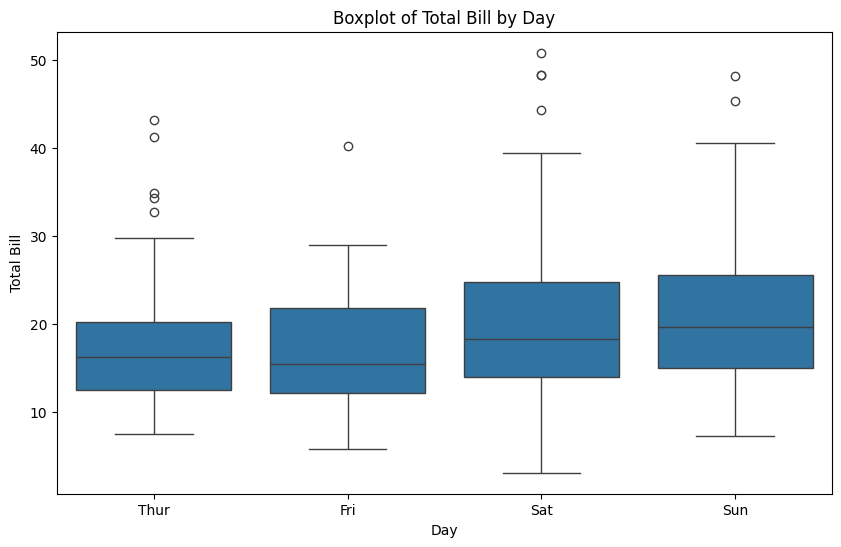

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Boxplot of Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')    

Text(0, 0.5, 'Total Bill')

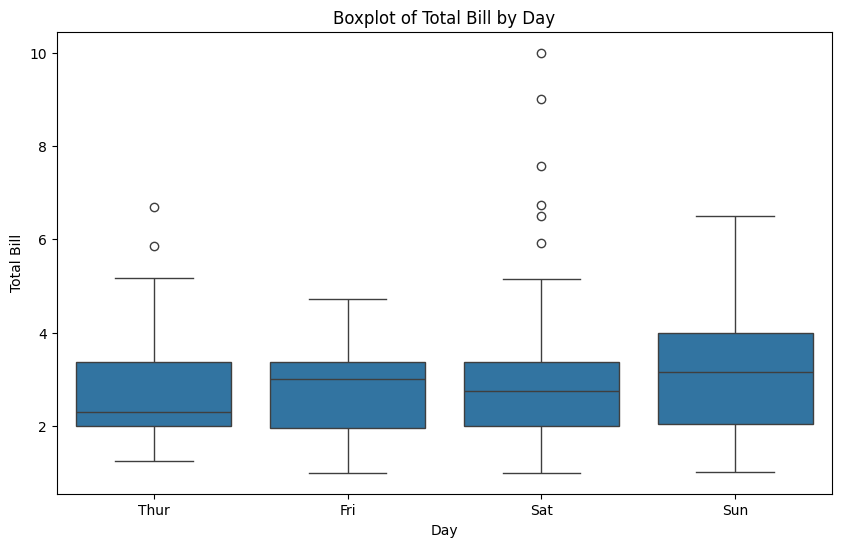

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='tip', data=df)
plt.title('Boxplot of Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')    

In [13]:
q1=df["total_bill"].quantile(0.25)
q3=df["total_bill"].quantile(0.75)
print(q1, q3)

13.3475 24.127499999999998


In [14]:
iqr=q3-q1
print(iqr)

10.779999999999998


In [ ]:
# lower and upper bounds
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
lower_bound, upper_bound

(np.float64(-2.8224999999999945), np.float64(40.29749999999999))

In [17]:
df[df["total_bill"]<lower_bound]

,total_bill,tip,sex,smoker,day,time,size


In [20]:
condtition = (df["total_bill"]<lower_bound) | (df["total_bill"]>upper_bound)
sum(condtition)

9

In [ ]:
condtition = (df["total_bill"]<lower_bound) | (df["total_bill"]>upper_bound)
df["is_outlier"]=condtition 
df

,total_bill,tip,sex,smoker,day,time,size,is_outlier
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False
2,21.01,3.50,Male,No,Sun,Dinner,3,False
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,False
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False


In [22]:
df[df["is_outlier"]==True]

,total_bill,tip,sex,smoker,day,time,size,is_outlier
59,48.27,6.73,Male,No,Sat,Dinner,4,True
102,44.30,2.50,Female,Yes,Sat,Dinner,3,True
142,41.19,5.00,Male,No,Thur,Lunch,5,True
156,48.17,5.00,Male,No,Sun,Dinner,6,True
170,50.81,10.00,Male,Yes,Sat,Dinner,3,True
182,45.35,3.50,Male,Yes,Sun,Dinner,3,True
184,40.55,3.00,Male,Yes,Sun,Dinner,2,True
197,43.11,5.00,Female,Yes,Thur,Lunch,4,True
212,48.33,9.00,Male,No,Sat,Dinner,4,True


In [26]:
total_bill_mean=df["total_bill"].median()
total_bill_mean

np.float64(17.795)

In [ ]:
df[df["is_outlier"]==True]

,total_bill,tip,sex,smoker,day,time,size,is_outlier
59,48.27,6.73,Male,No,Sat,Dinner,4,True
102,44.30,2.50,Female,Yes,Sat,Dinner,3,True
142,41.19,5.00,Male,No,Thur,Lunch,5,True
156,48.17,5.00,Male,No,Sun,Dinner,6,True
170,50.81,10.00,Male,Yes,Sat,Dinner,3,True
182,45.35,3.50,Male,Yes,Sun,Dinner,3,True
184,40.55,3.00,Male,Yes,Sun,Dinner,2,True
197,43.11,5.00,Female,Yes,Thur,Lunch,4,True
212,48.33,9.00,Male,No,Sat,Dinner,4,True


In [28]:
df["total_bill"][(df["is_outlier"]==True) & (df["total_bill"]<lower_bound)]=total_bill_mean
df[df["is_outlier"]==True]

/tmp/ipykernel_273390/4077841494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_bill"][(df["is_outlier"]==True) & (df["total_bill"]<lower_bound)]=total_bill_mean


,total_bill,tip,sex,smoker,day,time,size,is_outlier
59,48.27,6.73,Male,No,Sat,Dinner,4,True
102,44.30,2.50,Female,Yes,Sat,Dinner,3,True
142,41.19,5.00,Male,No,Thur,Lunch,5,True
156,48.17,5.00,Male,No,Sun,Dinner,6,True
170,50.81,10.00,Male,Yes,Sat,Dinner,3,True
182,45.35,3.50,Male,Yes,Sun,Dinner,3,True
184,40.55,3.00,Male,Yes,Sun,Dinner,2,True
197,43.11,5.00,Female,Yes,Thur,Lunch,4,True
212,48.33,9.00,Male,No,Sat,Dinner,4,True


##  

## outlier with group data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
def replace_in_group(group):
    group_median=group["total_bill"].median()
    q1=group["total_bill"].quantile(0.25)
    q3=group["total_bill"].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    # condition=(group["total_bill"]<lower_bound) | (group["total_bill"]>upper_bound)
    group["total_bill"]=np.where((group["total_bill"<lower_bound])|(group["total_bill"]>upper_bound), group_median, group["total_bill"])
    return group


In [4]:
q1=df["total_bill"].quantile(0.25)
q3=df["total_bill"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)


In [5]:
condtition = (df["total_bill"]<lower_bound) | (df["total_bill"]>upper_bound)
df["is_outlier"]=condtition 
df

,total_bill,tip,sex,smoker,day,time,size,is_outlier
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False
2,21.01,3.50,Male,No,Sun,Dinner,3,False
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,False
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False


In [10]:
df.groupby("sex").apply(replace_in_group)

/tmp/ipykernel_5419/3863393188.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex").apply(replace_in_group)


UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> None